In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('8_Channels_MyoArmband_DATA_AS_Images_10poses.csv')
df.head()

,Channel_0,Channel_0.1,Channel_0.2,Channel_0.3,Channel_0.4,Channel_0.5,Channel_0.6,Channel_0.7,Channel_0.8,Channel_0.9,...,Channel_7.55,Channel_7.56,Channel_7.57,Channel_7.58,Channel_7.59,Channel_7.60,Channel_7.61,Channel_7.62,Channel_7.63,Class
0,62,70,66,75,70,70,62,64,60,63,...,26,24,24,28,27,26,24,27,22,0
1,65,55,55,62,65,65,64,74,61,61,...,22,28,30,27,27,27,25,25,26,0
2,75,74,82,105,107,106,106,101,73,63,...,24,25,25,26,26,27,28,27,26,0
3,72,72,75,63,73,67,71,69,72,63,...,29,29,28,29,27,29,28,30,28,0
4,79,105,106,95,92,91,69,60,58,62,...,23,23,23,22,22,23,21,23,23,0


In [3]:
print(df.shape)

(6812, 513)


In [4]:
features = df.drop(columns=["Class"])
features.head()

,Channel_0,Channel_0.1,Channel_0.2,Channel_0.3,Channel_0.4,Channel_0.5,Channel_0.6,Channel_0.7,Channel_0.8,Channel_0.9,...,Channel_7.54,Channel_7.55,Channel_7.56,Channel_7.57,Channel_7.58,Channel_7.59,Channel_7.60,Channel_7.61,Channel_7.62,Channel_7.63
0,62,70,66,75,70,70,62,64,60,63,...,25,26,24,24,28,27,26,24,27,22
1,65,55,55,62,65,65,64,74,61,61,...,23,22,28,30,27,27,27,25,25,26
2,75,74,82,105,107,106,106,101,73,63,...,29,24,25,25,26,26,27,28,27,26
3,72,72,75,63,73,67,71,69,72,63,...,29,29,29,28,29,27,29,28,30,28
4,79,105,106,95,92,91,69,60,58,62,...,24,23,23,23,22,22,23,21,23,23


In [5]:
print (features.shape)

(6812, 512)


In [6]:
Classes = df["Class"]
print(Classes.shape)
print("class :", Classes.unique())
print("Value Count :\n",Classes.value_counts())

(6812,)
class : [0 1 2 3 4 5 6 7 8 9]
Value Count :
 1    795
2    794
3    789
6    787
4    783
7    775
0    765
5    746
9    291
8    287
Name: Class, dtype: int64


In [7]:
features_2D = features.to_numpy().reshape(6812, 8, 8, 8)

print (features_2D.shape)

(6812, 8, 8, 8)


In [8]:
features_2D.max()

1904

In [9]:
features_2D = tf.keras.utils.normalize(features_2D,axis=1)
features_2D.max()

0.9977383438308748

In [10]:
from sklearn.model_selection import train_test_split
# 70 and 30
x_train, x_test, y_train, y_test = train_test_split(features_2D, Classes, test_size=0.3, random_state=1)

In [11]:
print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

(4768, 8, 8, 8)
(4768,)
(2044, 8, 8, 8)
(2044,)


In [12]:
# one hot encoding Labels
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


print (x_train.shape)
print (y_train.shape)

print (x_test.shape)
print (y_test.shape)

(4768, 8, 8, 8)
(4768, 10)
(2044, 8, 8, 8)
(2044, 10)


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512, (2,2), activation='relu', input_shape=(8, 8, 8)),
    tf.keras.layers.MaxPooling2D(2,2,padding='same'),
    
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2,padding='same'), 
    
    
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2,padding='same'),
    
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Flatten(), 
    #tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    
    #tf.keras.layers.Dropout(0.1),
    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 7, 7, 512)         16896     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 128)         262272    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 64)          32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 1, 64)          0

In [14]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
x_v, x_t, y_v, y_t = train_test_split(x_test, y_test, test_size=0.5, random_state=1)

In [16]:
print (x_t.shape)
print (y_t.shape)

print (x_v.shape)
print (y_v.shape)

(1022, 8, 8, 8)
(1022, 10)
(1022, 8, 8, 8)
(1022, 10)


In [17]:
import os

checkpoint_path = "CNN_model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

history = model.fit(x_train, y_train,
                    validation_data=(x_t, y_t),
                    steps_per_epoch=50,
                    epochs=100,
                    validation_steps=10,
                    callbacks=[cp_callback])

Epoch 1/100
50/50 [==============================] - 5s 88ms/step - loss: 2.1802 - accuracy: 0.1451 - val_loss: 1.7134 - val_accuracy: 0.2955

Epoch 00001: saving model to CNN_model/cp.ckpt
Epoch 2/100
50/50 [==============================] - 4s 79ms/step - loss: 1.6749 - accuracy: 0.3242 - val_loss: 1.4319 - val_accuracy: 0.4198

Epoch 00002: saving model to CNN_model/cp.ckpt
Epoch 3/100
50/50 [==============================] - 4s 87ms/step - loss: 1.4021 - accuracy: 0.4328 - val_loss: 1.2137 - val_accuracy: 0.5088

Epoch 00003: saving model to CNN_model/cp.ckpt
Epoch 4/100
50/50 [==============================] - 4s 88ms/step - loss: 1.1919 - accuracy: 0.5307 - val_loss: 1.0290 - val_accuracy: 0.6037

Epoch 00004: saving model to CNN_model/cp.ckpt
Epoch 5/100
50/50 [==============================] - 5s 96ms/step - loss: 1.0824 - accuracy: 0.5841 - val_loss: 1.0962 - val_accuracy: 0.5890

Epoch 00005: saving model to CNN_model/cp.ckpt
Epoch 6/100
50/50 [==============================]

Epoch 44/100
50/50 [==============================] - 7s 134ms/step - loss: 0.2002 - accuracy: 0.9269 - val_loss: 0.2407 - val_accuracy: 0.9178

Epoch 00044: saving model to CNN_model/cp.ckpt
Epoch 45/100
50/50 [==============================] - 6s 111ms/step - loss: 0.1711 - accuracy: 0.9413 - val_loss: 0.2407 - val_accuracy: 0.9227

Epoch 00045: saving model to CNN_model/cp.ckpt
Epoch 46/100
50/50 [==============================] - 6s 126ms/step - loss: 0.1484 - accuracy: 0.9483 - val_loss: 0.2310 - val_accuracy: 0.9295

Epoch 00046: saving model to CNN_model/cp.ckpt
Epoch 47/100
50/50 [==============================] - 5s 109ms/step - loss: 0.1500 - accuracy: 0.9449 - val_loss: 0.2392 - val_accuracy: 0.9276

Epoch 00047: saving model to CNN_model/cp.ckpt
Epoch 48/100
50/50 [==============================] - 5s 90ms/step - loss: 0.1396 - accuracy: 0.9533 - val_loss: 0.2720 - val_accuracy: 0.9100

Epoch 00048: saving model to CNN_model/cp.ckpt
Epoch 49/100
50/50 [=====================


Epoch 00086: saving model to CNN_model/cp.ckpt
Epoch 87/100
50/50 [==============================] - 7s 140ms/step - loss: 0.1072 - accuracy: 0.9614 - val_loss: 0.2251 - val_accuracy: 0.9325

Epoch 00087: saving model to CNN_model/cp.ckpt
Epoch 88/100
50/50 [==============================] - 6s 113ms/step - loss: 0.1080 - accuracy: 0.9644 - val_loss: 0.2059 - val_accuracy: 0.9423

Epoch 00088: saving model to CNN_model/cp.ckpt
Epoch 89/100
50/50 [==============================] - 7s 139ms/step - loss: 0.0828 - accuracy: 0.9689 - val_loss: 0.1960 - val_accuracy: 0.9560

Epoch 00089: saving model to CNN_model/cp.ckpt
Epoch 90/100
50/50 [==============================] - 6s 118ms/step - loss: 0.0632 - accuracy: 0.9783 - val_loss: 0.1981 - val_accuracy: 0.9452

Epoch 00090: saving model to CNN_model/cp.ckpt
Epoch 91/100
50/50 [==============================] - 6s 129ms/step - loss: 0.0898 - accuracy: 0.9703 - val_loss: 0.2149 - val_accuracy: 0.9393

Epoch 00091: saving model to CNN_model/

Text(0.5, 1.0, 'Training and validation loss')

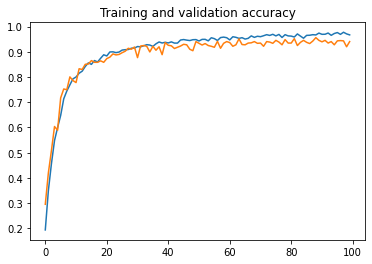

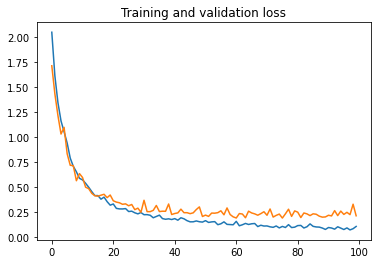

In [18]:
# Retrieve a list of list results on training and test data
# sets for each training epoch
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

# Plot training and validation accuracy per epoch
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

# Plot training and validation loss per epoch
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [19]:
loss, acc = model.evaluate(x_t, y_t, batch_size = 4)
print("Test loss :",loss)
print("Test accuracy :",acc*100,"%")

256/256 [==============================] - 1s 3ms/step - loss: 0.2097 - accuracy: 0.9403
Test loss : 0.20969758927822113
Test accuracy : 94.03131008148193 %


In [20]:
loss, acc = model.evaluate(x_v, y_v, batch_size = 4)
print("Test loss :",loss)
print("Test accuracy :",acc*100,"%")

256/256 [==============================] - 1s 3ms/step - loss: 0.2768 - accuracy: 0.9305
Test loss : 0.2768038809299469
Test accuracy : 93.05284023284912 %


In [21]:
import time
start_time = time.time()

print("Predicted Class: ", np.round(model.predict(x_t)[0]))
print("Actual Class: ", (y_t[0]))


print("--- %s seconds ---" % (time.time() - start_time))

Predicted Class:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Actual Class:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
--- 0.3827519416809082 seconds ---
